# Lennard-Jones Potential

Imagine two rubber balls separated by a large distance. Both objects are far enough apart that they are not interacting. 

The two balls can be brought closer together with minimal energy, allowing interaction. The balls can continuously be brought closer together until they are touching. 

At this point, it becomes difficult to further decrease the distance between the two balls. To bring the balls any closer together, increasing amounts of energy must be added.
This is because eventually, as the balls begin to invade each other’s space, they repel each other; the force of repulsion is far greater than the force of attraction.

In [160]:
import os
import numpy as np
from matplotlib import pyplot as plt

# initialize global variables here
epsilon = 1.67e-21         # energy parameter
sigma = 3.4e-10            # length parameter
cutoff = 3.5*sigma         # interaction cutoff

In [161]:
pos_vector  = [(5+x/10) for x in range(10)]
pos_vector1  = [(5+x/10) for x in range(0,11)]

print(pos_vector)
print('\n', pos_vector1)

[5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9]

 [5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]


In [162]:
def getRelaxedLatticeConstant():

    # initialize the array of lattice constants 

    pos_vector  = [(5+x/10) for x in range(10)]
    print(pos_vector,'\n')
    print("converted to angstrome")
    pos_vector = 1e-10*np.array(pos_vector)
    print(pos_vector,'\n')

    # make a list of energies to store energy corresponding to the positions of
    # each atom in the position vector

    energies = []

    for i in pos_vector:
        energies.append(get_potential_energy(i))

    print("calculated energies corresponding to positions of each atom")
    for i in energies:
        print(i,' ')

    
    # plot the graph of energies for position in position vector
    
    plt.plot(pos_vector * (1e+10) , energies, 'ro-')

    plt.xlabel('Lattice constant (angstrome)')
    plt.ylabel('Energy ( J )')
    plt.show()

    return pos_vector[np.argmin(energies)]


    

to calculate the potential energy at each position

'''
    function to calculate the potential energy given the lattice constant
    Input: lattice constant
    Output: corresponding potential energy
    '''

In [163]:
def get_potential_energy(atom_position):

    # generating the unit cell 

    unit_cell = get_unit_cell(atom_position)

    # generating the supercell with all interations corresponding to given unit cell

    super_cell = get_super_cell(unit_cell)

    # calculate energy corresponding to given unit cell and super cell

    return get_energy(unit_cell, super_cell)


to get unit cell from the atomic positions

In [164]:
a = np.eye(3,3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [165]:
def get_unit_cell(atom_position):

    lattice_vector = atom_position * np.eye(3,3)

    # as it is in fcc given which is given
    # we know this is in fcc coordinates 
    direct = [[0.0,0.0,0.0],
              [0.0,0.5,0.5],
              [0.5,0.0,0.5],
              [0.5,0.5,0.0]]
    
    direct = np.array(direct)

    # to get cartesian coordinate 

    cartesian = np.matmul(direct, lattice_vector)

    # storing all the information into the a dictionary

    unit_cell_data = {'position vector' : lattice_vector,
                      'direct coordinates': direct,
                      'cartesian coordinates': cartesian}
    
    return unit_cell_data



    

 getting super cell

'''
    function to generate Supercell including all interactions of the unitcell atoms
    Input: unitcell
    Output: dictionary consisting of lattice vectors and basis of supercell
    '''

 '''
    here we need to repeat the ucell in x,y,z directions until we include all interactions.
    However, we do not know 'how many times to repeat' beforehand.
    As such, we need to iterate here.
    '''


 '''
    We will start with some initial number of rep, Nrep=[1,1,1] in x,y,z directions.
    For this Nrep, we will count the number of neighbors of unitcell atoms within the cutoff cloud.
    Next, we will increase Nrep by one and check if the number of neighbors change.
    if neighbors_count do not change on increasing Nrep, then supercell is of right size.
    else we need to increas ethe size.
    '''

In [166]:
def get_super_cell(unit_cell):

    repetition_counter = 1

    while True:

        # get super cell to repetition counter size and count neighbors
        super_cell = get_repeated_cell(unit_cell,repetition_counter)
        neighbour_current = count_neighbour(unit_cell,super_cell)

        # get super cell for the next counter for the comparision

        super_cell = get_repeated_cell(unit_cell,repetition_counter+1)
        neighbour_next = count_neighbour(unit_cell,super_cell)

        if neighbour_current == neighbour_next:
            break

        repetition_counter += 1

    return get_repeated_cell(unit_cell,repetition_counter)


        

to get repeated cell 

'''
    function to generate a supercell of given size
    Input: unitcell and Number of repetitions
    Output: supercell
    '''

In [167]:
def get_repeated_cell(unit_cell,repetition_counter):

    direct  = []

    for i in range(-repetition_counter,repetition_counter+1):

        for j in range(-repetition_counter,repetition_counter+1):

            for k in range(-repetition_counter,repetition_counter+1):


                # for every atom in the uni cell
                for unit_cell_atom in unit_cell['direct coordinates']:

                    # position in super cell is [ position of unit cell atom ] + position of unit cell
                    position = unit_cell_atom + [i,j,k]

                    direct.append(position)



    # to get cartesian coordinates
    
    cartesian = np.matmul(direct,unit_cell['position vector'])

    position_lattice_vector_of_super_cell = (2*repetition_counter+1) * unit_cell['position vector']


    super_cell = {'cartesian' : cartesian,
                  'direct': direct,
                  'position vector': position_lattice_vector_of_super_cell}
    
    return super_cell

    

to count the neighbours

 '''
    function to count the number of neighbors between atoms in unitcell and supercell
    
    Input: unitcell and supercell
    Output: number of neighbors
    '''

In [168]:
def count_neighbour(unit_cell,super_cell):

    count = 0

    for unit_cell_atom in unit_cell['cartesian coordinates']:

        for super_cell_atom in super_cell['cartesian']:

            dist2 = np.sum((unit_cell_atom - super_cell_atom)**2)
            distance = np.sqrt(dist2)

            if distance < (cutoff + 1e-15):
                count += 1
    

    return count

    


 '''
    function to calculate energy/atom of given ucell-scell
    Input: unitcell and supercell
    Output: Correspodning energy of system
    '''

In [169]:
def get_energy(unit_cell,super_cell):
    
    energy = 0

    for unit_cell_atom in unit_cell['cartesian coordinates']:

        for super_cell_atom in super_cell['cartesian']:

            distance = np.sum((unit_cell_atom - super_cell_atom)**2)
            distance = np.sqrt(distance)
            

            # make sure that they are not the same atoms
            if distance < 1e-15:
                continue

            factor = 1.0

            if atom_in_unit_cell(unit_cell,super_cell_atom):
                factor = 0.5
            
            energy += factor * 4 * epsilon*((sigma/distance)**12 - (sigma/distance)**6)

    '''
    Note that we have made one mistake here. In calculating energy, we looped over
    all atoms in the unitcell and all atoms in the supercell. As such, some pairs are double-counted.
    for instance, take an atom i in the ucell and atom j in the supercell, such that j is also in the unitcell.
    In this case, we will include E_ij. But when we loop over unitcell atoms and find j, we will include E_ji.
    We need to fix this and this will be a part of your HW assignment.
    '''

    return energy/(len(unit_cell['cartesian coordinates']))



 '''
    function to check if given atom is in unitcell
    Input: unitcell and atom to check
    Output: boolean specifying if atom is in cell
    '''

In [170]:
def atom_in_unit_cell(unit_cell,super_cell_atom):

    for unit_cell_atom in unit_cell['cartesian coordinates']:

        distance = np.sum((unit_cell_atom-super_cell_atom)**2)
        distance = np.sqrt(distance)

        if distance < 1e-6:
            return True
        

    return False


[5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9] 

converted to angstrome
[5.0e-10 5.1e-10 5.2e-10 5.3e-10 5.4e-10 5.5e-10 5.6e-10 5.7e-10 5.8e-10
 5.9e-10] 



calculated energies corresponding to positions of each atom
-1.2612907560695753e-20  
-1.3721576147677706e-20  
-1.4168939905472465e-20  
-1.4163974922903837e-20  
-1.3856009441761062e-20  
-1.3351539814959686e-20  
-1.2726232206406335e-20  
-1.2033524028273819e-20  
-1.1310811464883952e-20  
-1.0583915092827261e-20  


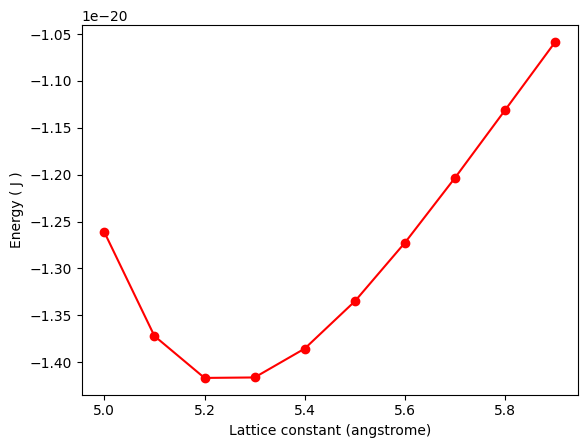

5.200000000000001e-10

In [171]:
getRelaxedLatticeConstant()